# Musculoskeletal models, Motion Files, and Muscle Analysis

In [2]:
import opensim as osim
import matplotlib.pyplot as plt
import numpy as np

## Load model

In [3]:
# download the model file
!gdown "1Qiqno8NWrBJyo9wMingz1HbJ5FbvfIHo&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Qiqno8NWrBJyo9wMingz1HbJ5FbvfIHo&confirm=t
To: /home/ubuntu/injury_detection/jupyter_notebooks/gait2392.osim
100%|████████████████████████████████████████| 565k/565k [00:00<00:00, 3.46MB/s]


In [4]:
# Load the model.
gait2392 = osim.Model('/home/ubuntu/injury_detection/SMPL2AddBiomechanics/models/bsm/bsm.osim')

# Print metadata.
print("Name of the model:", gait2392.getName())
print("Author:", gait2392.get_credits())
print("Publications:", gait2392.get_publications())
print("Length Unit:", gait2392.get_length_units())
print("Force Unit:", gait2392.get_force_units())
print("Gravity:", gait2392.get_gravity())

[info] Updating Model file from 40000 to latest format...
Name of the model: FullBodyModel_MuscleActuatedLowerLimb_TorqueActuatedUpperBody
Author: 1. Rajagopal, A, Dembia, C.L., DeMers, M.S., Delp, D.D., Hicks, J.L., and Delp, S.L. 2. Ajay Seth, Meilin Dong, Ricardo Matias, Scott Delp. Parameters from van der Helm and Klein-Breteler
Publications: 1. Rajagopal, Apoorva, et al. "Full-Body Musculoskeletal Model for Muscle-Driven Simulation of Human Gait." IEEE Transactions on Biomedical Engineering 63.10 (2016): 2068-2079. (2016) 2. Seth, et al. "Muscle Contributions to Upper-Extremity Movement and Work From a Musculoskeletal Model of the Human Shoulder". Frontiers in Neurorobotics (2019). Parameters from van der Helm 1994, Klein-Breteler et al. 1996.
Length Unit: meters
Force Unit: N
Gravity: ~[0,-9.80665,0]
[info] Loaded model FullBodyModel_MuscleActuatedLowerLimb_TorqueActuatedUpperBody from file /home/ubuntu/injury_detection/SMPL2AddBiomechanics/models/bsm/bsm.osim
[warning] Couldn't 

## Explore the coordinates of the model

In [5]:
# Print the number of coordinates.
print("Num Coordinates:", gait2392.getNumCoordinates())
print()

# For each coordinate, print some information, such as its name or motion type.
for coordinate in gait2392.getCoordinateSet():
  print("  Coordinate Name:", coordinate.getName())
  print("  Coordinate Absolute Path:", coordinate.getAbsolutePathString())
  
  # Motion type is an enumerate (0:Undefined, 1:Rotational, 2:Translational, 3:Coupled).
  motion_type = coordinate.getMotionType()
  motion_type_string = ""
  if motion_type == 0:
    motion_type_string = "Undefined"
  elif motion_type == 1:
    motion_type_string = "Rotational"
  elif motion_type == 2:
    motion_type_string = "Translational "
  elif motion_type == 3:
    motion_type_string = "Coupled "
  print("  Coordinate Motion Type:", motion_type_string)
  
  print()

Num Coordinates: 51

  Coordinate Name: pelvis_tilt
  Coordinate Absolute Path: /jointset/ground_pelvis/pelvis_tilt
  Coordinate Motion Type: Rotational

  Coordinate Name: pelvis_list
  Coordinate Absolute Path: /jointset/ground_pelvis/pelvis_list
  Coordinate Motion Type: Rotational

  Coordinate Name: pelvis_rotation
  Coordinate Absolute Path: /jointset/ground_pelvis/pelvis_rotation
  Coordinate Motion Type: Rotational

  Coordinate Name: pelvis_tx
  Coordinate Absolute Path: /jointset/ground_pelvis/pelvis_tx
  Coordinate Motion Type: Translational 

  Coordinate Name: pelvis_ty
  Coordinate Absolute Path: /jointset/ground_pelvis/pelvis_ty
  Coordinate Motion Type: Translational 

  Coordinate Name: pelvis_tz
  Coordinate Absolute Path: /jointset/ground_pelvis/pelvis_tz
  Coordinate Motion Type: Translational 

  Coordinate Name: hip_flexion_r
  Coordinate Absolute Path: /jointset/hip_r/hip_flexion_r
  Coordinate Motion Type: Rotational

  Coordinate Name: hip_adduction_r
  Coordin

## Explore some of the model's joint properties

In [6]:
# Print number of joints.
print("Num Joints:", gait2392.getNumJoints())
print()

# For each joint, print some information, such as its name or components.
for joint in gait2392.getJointSet():
  print("Joint Name:", joint.getName())
  print("Joint Absolute Path:", joint.getAbsolutePathString())
  print("Components:")
  for component in joint.getComponentsList():
    print("  Component Name:", component.getName())
    print("  Component Absolute Path:", component.getAbsolutePathString())

Num Joints: 26

Joint Name: ground_pelvis
Joint Absolute Path: /jointset/ground_pelvis
Components:
  Component Name: pelvis_tilt
  Component Absolute Path: /jointset/ground_pelvis/pelvis_tilt
  Component Name: pelvis_list
  Component Absolute Path: /jointset/ground_pelvis/pelvis_list
  Component Name: pelvis_rotation
  Component Absolute Path: /jointset/ground_pelvis/pelvis_rotation
  Component Name: pelvis_tx
  Component Absolute Path: /jointset/ground_pelvis/pelvis_tx
  Component Name: pelvis_ty
  Component Absolute Path: /jointset/ground_pelvis/pelvis_ty
  Component Name: pelvis_tz
  Component Absolute Path: /jointset/ground_pelvis/pelvis_tz
  Component Name: ground_offset
  Component Absolute Path: /jointset/ground_pelvis/ground_offset
  Component Name: frame_geometry
  Component Absolute Path: /jointset/ground_pelvis/ground_offset/frame_geometry
  Component Name: wrapobjectset
  Component Absolute Path: /jointset/ground_pelvis/ground_offset/wrapobjectset
  Component Name: pelvis_o

## Muscle

In [7]:
# Print the number of muscles.
print("Num Muscles:", gait2392.getMuscles().getSize())
print()

for muscle in gait2392.getMuscles():
  print("Muscle Name:", muscle.getName())
  print("Muscle Absolute Path:", muscle.getAbsolutePathString())
  print()

Num Muscles: 80

Muscle Name: addbrev_r
Muscle Absolute Path: /forceset/addbrev_r

Muscle Name: addlong_r
Muscle Absolute Path: /forceset/addlong_r

Muscle Name: addmagDist_r
Muscle Absolute Path: /forceset/addmagDist_r

Muscle Name: addmagIsch_r
Muscle Absolute Path: /forceset/addmagIsch_r

Muscle Name: addmagMid_r
Muscle Absolute Path: /forceset/addmagMid_r

Muscle Name: addmagProx_r
Muscle Absolute Path: /forceset/addmagProx_r

Muscle Name: bflh_r
Muscle Absolute Path: /forceset/bflh_r

Muscle Name: bfsh_r
Muscle Absolute Path: /forceset/bfsh_r

Muscle Name: edl_r
Muscle Absolute Path: /forceset/edl_r

Muscle Name: ehl_r
Muscle Absolute Path: /forceset/ehl_r

Muscle Name: fdl_r
Muscle Absolute Path: /forceset/fdl_r

Muscle Name: fhl_r
Muscle Absolute Path: /forceset/fhl_r

Muscle Name: gaslat_r
Muscle Absolute Path: /forceset/gaslat_r

Muscle Name: gasmed_r
Muscle Absolute Path: /forceset/gasmed_r

Muscle Name: glmax1_r
Muscle Absolute Path: /forceset/glmax1_r

Muscle Name: glmax2_r

In [8]:
# Use the TableProcessor to read the motion file.
tableTime = osim.TimeSeriesTable('/home/ubuntu/injury_detection/SMPL2AddBiomechanics/models/bsm/sample_motion/01/01_01_ik.mot')
# Process the file.
# Print the column labels.
print(tableTime.getColumnLabels())

('pelvis_tilt', 'pelvis_list', 'pelvis_rotation', 'pelvis_tx', 'pelvis_ty', 'pelvis_tz', 'hip_flexion_r', 'hip_adduction_r', 'hip_rotation_r', 'knee_angle_r', 'ankle_angle_r', 'subtalar_angle_r', 'mtp_angle_r', 'hip_flexion_l', 'hip_adduction_l', 'hip_rotation_l', 'knee_angle_l', 'ankle_angle_l', 'subtalar_angle_l', 'mtp_angle_l', 'lumbar_bending', 'lumbar_extension', 'lumbar_twist', 'thorax_bending', 'thorax_extension', 'thorax_twist', 'head_bending', 'head_extension', 'head_twist', 'scapula_abduction_r', 'scapula_elevation_r', 'scapula_upward_rot_r', 'shoulder_r_x', 'shoulder_r_y', 'shoulder_r_z', 'elbow_flexion_r', 'pro_sup_r', 'wrist_flexion_r', 'wrist_deviation_r', 'scapula_abduction_l', 'scapula_elevation_l', 'scapula_upward_rot_l', 'shoulder_l_x', 'shoulder_l_y', 'shoulder_l_z', 'elbow_flexion_l', 'pro_sup_l', 'wrist_flexion_l', 'wrist_deviation_l')


### Plot the knee angle and hip adduction between both legs

1. extract this information from the motion file

In [9]:
# Get columns we want to analyze, and the time column (independent column).
y_knee_angle_r = tableTime.getDependentColumn('knee_angle_r')
y_knee_angle_l = tableTime.getDependentColumn('knee_angle_l')
y_hip_adduction_r = tableTime.getDependentColumn('hip_adduction_r')
y_hip_adduction_l = tableTime.getDependentColumn('hip_adduction_l')
x_time = tableTime.getIndependentColumn()

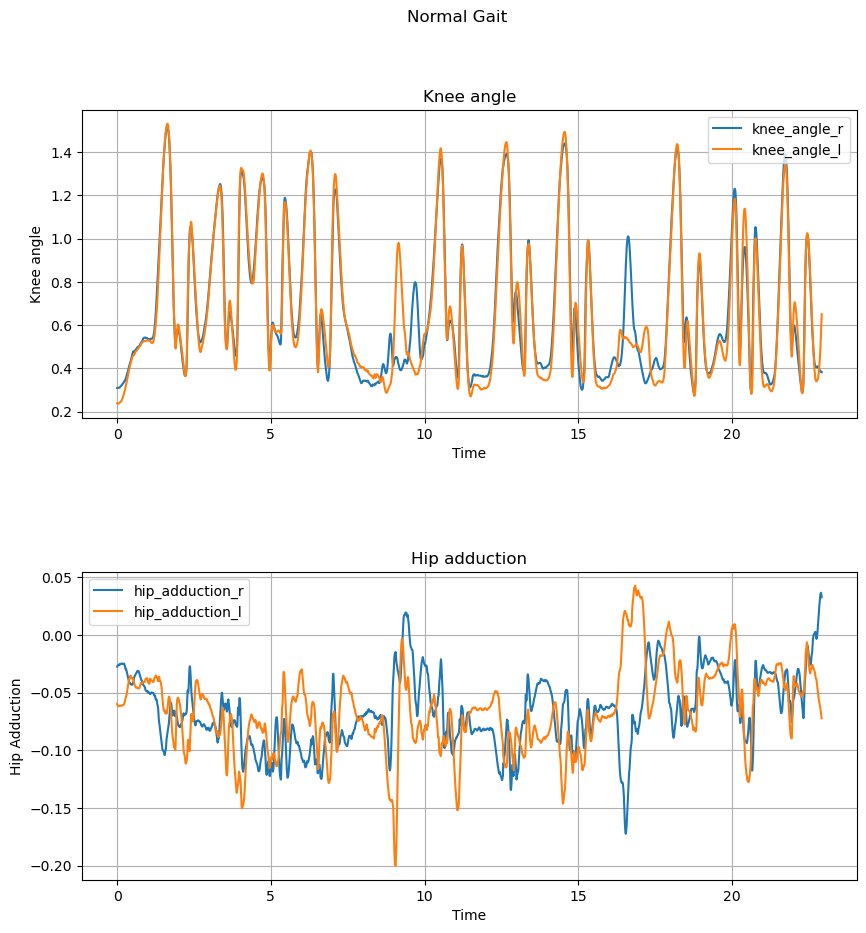

In [10]:
# Create six subplots, with 2 rows and 3 columns.
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Normal Gait')

# Plot the knee angles on the first subplot.
axs[0].plot(x_time, y_knee_angle_r.to_numpy(), label='knee_angle_r')
axs[0].plot(x_time, y_knee_angle_l.to_numpy(), label='knee_angle_l')
axs[0].set_title('Knee angle')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Knee angle')
axs[0].grid()
axs[0].legend()

# Plot the hip adductions on the second subplot.
axs[1].plot(x_time, y_hip_adduction_r.to_numpy(), label='hip_adduction_r')
axs[1].plot(x_time, y_hip_adduction_l.to_numpy(), label='hip_adduction_l')
axs[1].set_title('Hip adduction')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Hip Adduction')
axs[1].grid()
axs[1].legend()

# Set the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

## Muscle Analysis: Assessment of Hamstrings Length During Crouch Gait

### Range of Motion

In [11]:
!gdown "1hAhf9msXfW0jRau5mIQSGDIBcY_mGZ1K&confirm=t" # normal_gait.mot

Downloading...
From: https://drive.google.com/uc?id=1hAhf9msXfW0jRau5mIQSGDIBcY_mGZ1K&confirm=t
To: /home/ubuntu/injury_detection/jupyter_notebooks/normal_gait.mot
100%|██████████████████████████████████████| 5.37k/5.37k [00:00<00:00, 31.2MB/s]


In [12]:
!gdown "1p6wDdagbjZ8jbw_zr9mxN_4dnNIm38KB&confirm=t" # crouch_gait.mot


Downloading...
From: https://drive.google.com/uc?id=1p6wDdagbjZ8jbw_zr9mxN_4dnNIm38KB&confirm=t
To: /home/ubuntu/injury_detection/jupyter_notebooks/crouch_gait.mot
100%|██████████████████████████████████████| 14.1k/14.1k [00:00<00:00, 22.3MB/s]


In [13]:
# Use the TableProcessor to read the motion file.
table_processor_normal_gait = osim.TableProcessor('normal_gait.mot')
# Process the file.
table_normal_gait = table_processor_normal_gait.process()
# Print labels for each column.
print(table_normal_gait.getColumnLabels())

# Use the TableProcessor to read the motion file.
table_processor_crouch_gait = osim.TableProcessor('crouch_gait.mot')
# Process the file.
table_crouch_gait = table_processor_crouch_gait.process()
# Print labels for each column.
print(table_crouch_gait.getColumnLabels())

('pelvis_list', 'pelvis_rotation', 'pelvis_tilt', 'hip_flexion_r', 'hip_adduction_r', 'hip_rotation_r', 'knee_angle_r', 'ankle_angle_r', 'hip_flexion_l', 'hip_adduction_l', 'hip_rotation_l', 'knee_angle_l', 'ankle_angle_l', 'pelvis_ty', 'lumbar_bending', 'lumbar_rotation', 'lumbar_extension')
('pelvis_list', 'pelvis_rotation', 'pelvis_tilt', 'hip_flexion_r', 'hip_adduction_r', 'hip_rotation_r', 'knee_angle_r', 'ankle_angle_r', 'hip_flexion_l', 'hip_adduction_l', 'hip_rotation_l', 'knee_angle_l', 'ankle_angle_l', 'pelvis_ty', 'lumbar_bending', 'lumbar_rotation', 'lumbar_extension')


In [14]:
# Get columns we want to represent.
normal_gait_knee_angle_r = table_normal_gait.getDependentColumn('knee_angle_r')
crouch_gait_knee_angle_r = table_crouch_gait.getDependentColumn('knee_angle_r')

# Get independent columns of each table (time).
normal_gait_time = table_normal_gait.getIndependentColumn()
crouch_gait_time = table_crouch_gait.getIndependentColumn()

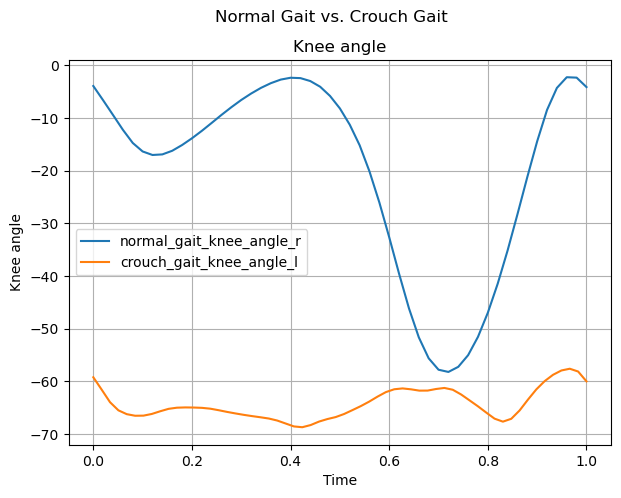

In [15]:
# Create six subplots, with 2 rows and 3 columns.
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
fig.suptitle('Normal Gait vs. Crouch Gait')

# Plot the knee angles on the first subplot.
axs.plot(normal_gait_time, normal_gait_knee_angle_r.to_numpy(), label='normal_gait_knee_angle_r')
axs.plot(crouch_gait_time, crouch_gait_knee_angle_r.to_numpy(), label='crouch_gait_knee_angle_l')
axs.set_title('Knee angle')
axs.set_xlabel('Time')
axs.set_ylabel('Knee angle')
axs.grid()
axs.legend()

# Set the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

### Hamstrings Length

Compare the hamstrings (semitendinosus) length over a patient's crouch gait cycle to the hamstrings length for a "normal" gait cycle

in this task, MuscleAnalysis must be performed to obtain the fiber lengths of the muscles.

In [16]:
# Load motion file and extract time.
tableTime = osim.TimeSeriesTable('normal_gait.mot')
x_time = tableTime.getIndependentColumn()

# Get first and last time.
first_time = x_time[0]
last_time = x_time[len(x_time) - 1]

Create a MuscleAnalysis and configure it

This analysis will be applied two times: One for the normal gait and another for the crouch gait.

In [17]:
# Define a MuscleAnalysis.
muscle_analysis = osim.MuscleAnalysis()

# Set start and end times for the analysis.
muscle_analysis.setStartTime(first_time)
muscle_analysis.setEndTime(last_time)

# Set the muscle of interest (semitendinosus on the right leg).
muscle_list = osim.ArrayStr()
muscle_list.append("semiten_r")
muscle_analysis.setMuscles(muscle_list)

# Configure the analysis.
muscle_analysis.setOn(True)
muscle_analysis.setStepInterval(1)
muscle_analysis.setInDegrees(True)
muscle_analysis.setComputeMoments(True)

Create an AnalyzeTool that, given a model file and a motion file, to perform the requested analysis

One for the normal gait and another one for the crouch gait

In [18]:
## Normal Gait.

# Create an AnalyzeTool for normal gait.
analyze_tool_normal_gait = osim.AnalyzeTool()
analyze_tool_normal_gait.setName("Muscle_Analysis_Normal_Gait")

# Set the model file and motion file to analyze.
analyze_tool_normal_gait.setModelFilename("gait2392.osim")
analyze_tool_normal_gait.setCoordinatesFileName("normal_gait.mot")

# Add the MuscleAnalysis to the AnalyzeTool.
analyze_tool_normal_gait.updAnalysisSet().cloneAndAppend(muscle_analysis)

# Directory where results are stored.
analyze_tool_normal_gait.setResultsDir("MA_Normal_Gait_Results")

# Configure AnalyzeTool.
analyze_tool_normal_gait.setReplaceForceSet(False)
analyze_tool_normal_gait.setSolveForEquilibrium(True)
analyze_tool_normal_gait.setStartTime(first_time)
analyze_tool_normal_gait.setFinalTime(last_time)

# Print configuration of the AnalyzeTool to an XML file.
analyze_tool_normal_gait.printToXML("Muscle_Analysis_Normal_Gait_AnalyzeTool_setup.xml")

# Load configuration and run the analyses. 
analyze_tool_normal_gait = osim.AnalyzeTool("Muscle_Analysis_Normal_Gait_AnalyzeTool_setup.xml", True)
result_normal_gait = analyze_tool_normal_gait.run()


## Crouch Gait.

# Create an AnalyzeTool for crouch gait.
analyze_tool_crouch_gait = osim.AnalyzeTool()
analyze_tool_crouch_gait.setName("Muscle_Analysis_Crouch_Gait")

# Set the model file and motion file to analyze.
analyze_tool_crouch_gait.setModelFilename("gait2392.osim")
analyze_tool_crouch_gait.setCoordinatesFileName("crouch_gait.mot")

# Add the Muscleanalysis to the AnalyzeTool.
analyze_tool_crouch_gait.updAnalysisSet().cloneAndAppend(muscle_analysis)

# Directory where results are stored.
analyze_tool_crouch_gait.setResultsDir("MA_Crouch_Gait_Results")

# Configure AnalyzeTool.
analyze_tool_crouch_gait.setReplaceForceSet(False)
analyze_tool_crouch_gait.setSolveForEquilibrium(True)
analyze_tool_crouch_gait.setStartTime(first_time)
analyze_tool_crouch_gait.setFinalTime(last_time)

# Print configuration of the AnalyzeTool to an XML file.
analyze_tool_crouch_gait.printToXML("Muscle_Analysis_Crouch_Gait_AnalyzeTool_setup.xml")

# Load configuration and run the analyses. 
analyze_tool_crouch_gait = osim.AnalyzeTool("Muscle_Analysis_Crouch_Gait_AnalyzeTool_setup.xml", True)
result_crouch_gait = analyze_tool_crouch_gait.run()

[info] AbstractTool Muscle_Analysis_Normal_Gait loading model gait2392.osim
[info] Updating Model file from 30000 to latest format...
[info] Loaded model subject01 from file gait2392.osim
[warning] Couldn't find file 'treadmill.vtp'.
[warning] Couldn't find file 'sacrum.vtp'.
[warning] Couldn't find file 'pelvis.vtp'.
[warning] Couldn't find file 'l_pelvis.vtp'.
[warning] Couldn't find file 'femur_r.vtp'.
[warning] Couldn't find file 'tibia_r.vtp'.
[warning] Couldn't find file 'fibula.vtp'.
[warning] Couldn't find file 'talus.vtp'.
[warning] Couldn't find file 'foot.vtp'.
[warning] Couldn't find file 'bofoot.vtp'.
[warning] Couldn't find file 'femur_l.vtp'.
[warning] Couldn't find file 'tibia_l.vtp'.
[warning] Couldn't find file 'l_fibula.vtp'.
[warning] Couldn't find file 'l_talus.vtp'.
[warning] Couldn't find file 'l_foot.vtp'.
[warning] Couldn't find file 'l_bofoot.vtp'.
[warning] Couldn't find file 'hat_spine.vtp'.
[warning] Couldn't find file 'hat_jaw.vtp'.
[warning] Couldn't find

Extract the fiber length of the semitendinous muscle

In [19]:
## Normal gait

# Get results from file.
table_fiber_length_normal_gait = osim.TimeSeriesTable(
    "MA_Normal_Gait_Results/Muscle_Analysis_Normal_Gait_MuscleAnalysis_FiberLength.sto")

# Get values.
time_normal_gait = table_fiber_length_normal_gait.getIndependentColumn()
fiber_length_semitendinous_normal_gait = table_fiber_length_normal_gait.getDependentColumn("semiten_r")


## Crouch gait

# Get results from file.
table_fiber_length_crouch_gait = osim.TimeSeriesTable(
    "MA_Crouch_Gait_Results/Muscle_Analysis_Crouch_Gait_MuscleAnalysis_FiberLength.sto")

# Get values.
time_crouch_gait = table_fiber_length_crouch_gait.getIndependentColumn()
fiber_length_semitendinous_crouch_gait = table_fiber_length_crouch_gait.getDependentColumn("semiten_r")

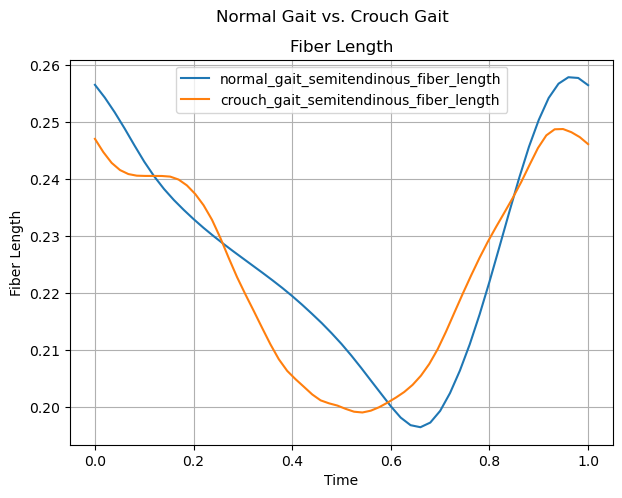

In [20]:
# Create six subplots, with 2 rows and 3 columns.
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
fig.suptitle('Normal Gait vs. Crouch Gait')

# Plot the knee angles on the first subplot.
axs.plot(time_normal_gait, fiber_length_semitendinous_normal_gait.to_numpy(), label='normal_gait_semitendinous_fiber_length')
axs.plot(time_crouch_gait, fiber_length_semitendinous_crouch_gait.to_numpy(), label='crouch_gait_semitendinous_fiber_length')
axs.set_title('Fiber Length')
axs.set_xlabel('Time')
axs.set_ylabel('Fiber Length')
axs.grid()
axs.legend()

# Set the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)